In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [4]:
mat1 = material(1.45^2,1.0)
mat2 = material(epstable("gold"),1.0);

In [5]:
w,d = 66.,20.
rc = 2.
Nc,Nw,Nd = 3,45,10;

In [6]:
rod₁ = Rod(w,d,rc,Nc,Nw,Nd,(0.,20.))
rod₂ = Rod(w,d,rc,Nc,Nw,Nd,(0.,-20.));

In [7]:
Structures = StructureC([rod₁; rod₂]);

In [8]:
xmin,ymin = -200.0,-90.0
xmax,ymax = 200.0,90.0
Δx,Δy = 10.0,10.5
m= 2
xA = collect(xmin:Δx:xmax)
yA = collect(ymin:Δy:ymax);
Xin,Xout,Yin,Yout = getMesh(xA,yA,Structures);

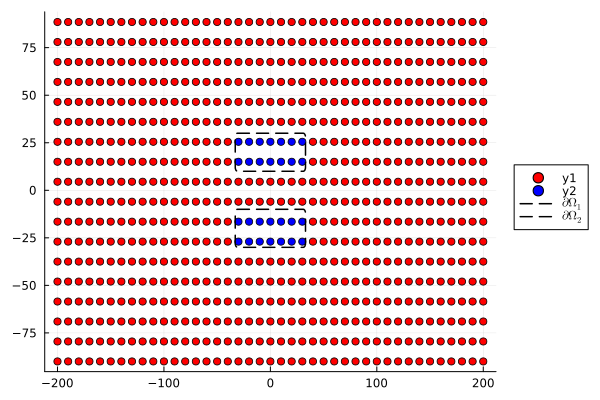

In [9]:
gr()
X₁,Y₁ = getSurfPoints(rod₁)
X₂,Y₂ = getSurfPoints(rod₂)
scatter(Xout,Yout,c=:red)
scatter!(Xin,Yin,c=:blue)
plot!(X₁,Y₁,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega_1")
plot!(X₂,Y₂,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega_2",legend=:outerright)

In [10]:
dThr = 50.
m = 2

2

In [30]:
i = 1

k0 = 2π/700
n₁ = mat1.n(k0)
n₂ = mat2.n(k0)
r = 500.
α = -90.

-90.0

In [31]:
H,ϕ = getHϕ(m,Structures,k0,n₂,n₁,dThr,α);

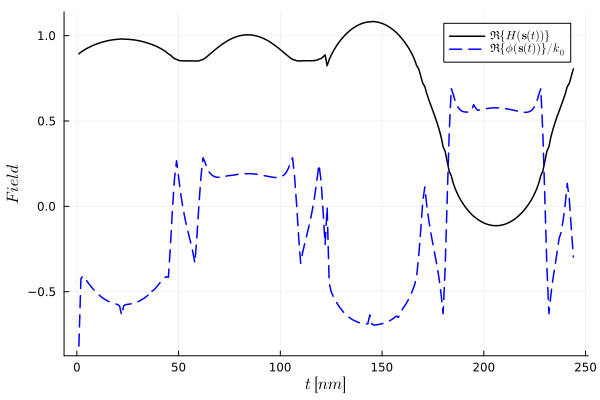

In [32]:
gr()
plot(real.(H[:,1]),c=:black,lw=1.5,label=L"\Re\{ H(\mathbf{s}(t)) \}")
plot!(real.(ϕ[:,1])./k0,c=:blue,lw=1.5,ls=:dash,label=L"\Re\{ \phi(\mathbf{s}(t)) \}/ k_0",xlabel=L"t~[nm]",ylabel=L"Field",legend=:topright)

# ========================================

## E

In [33]:
μ₀ = 1.25663706144e-6
ε₀ = 8.85418781762e-12


c1 = √(μ₀/ε₀)*(1/n₁)
c2 = √(μ₀/ε₀)*(1/n₂)
c2 = abs(c2)

92.78109796128129

In [34]:
Eo = Get_E0(k0,n₁,Xout,Yout,α);

In [35]:
Eout = getEfieldOutside(k0,n₁,m,dThr,Structures,Xout,Yout,α,H,ϕ);

In [36]:
Ein = getEfieldInside(k0,n₂,m,dThr,Structures,Xin,Yin,α,H,ϕ);

In [37]:
eff = [Xout Yout norm.(Eout)./c1;
        Xin Yin norm.(Ein)./c2];

In [38]:
ind = sortperm(eff[:,2])

ogrde = eff[ind,:]


ind2 = sortperm(ogrde[:,1])

ogrde2 = ogrde[ind2,:];

In [39]:
imagenE = reshape(ogrde2[:,3],(length(yA),length(xA)));

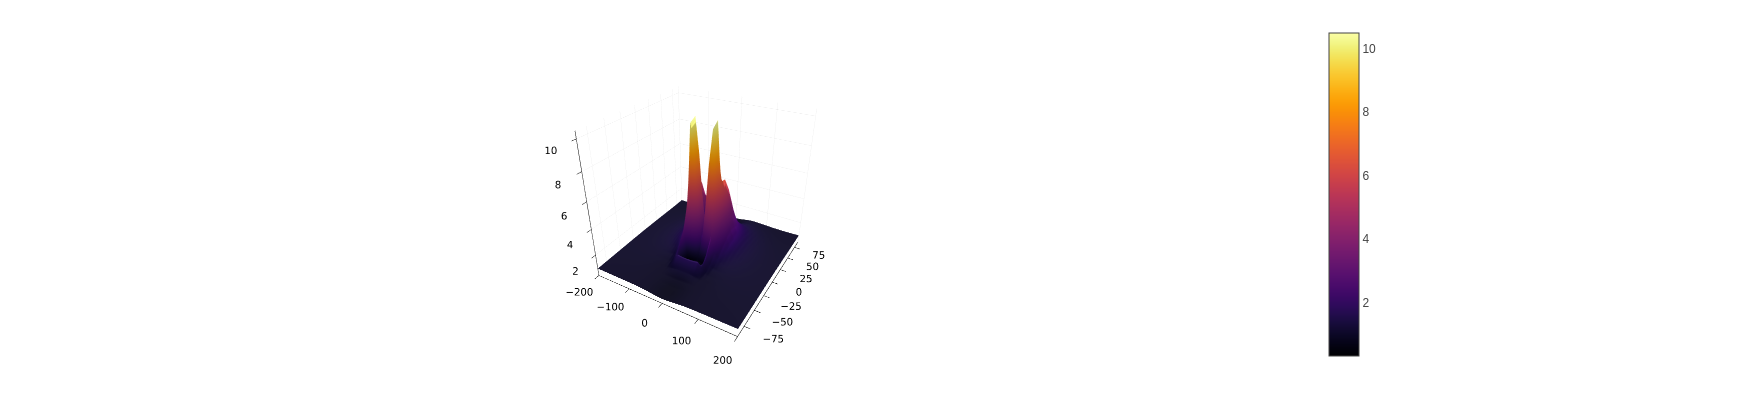

In [40]:
plotly()
surface(xA,yA,imagenE)

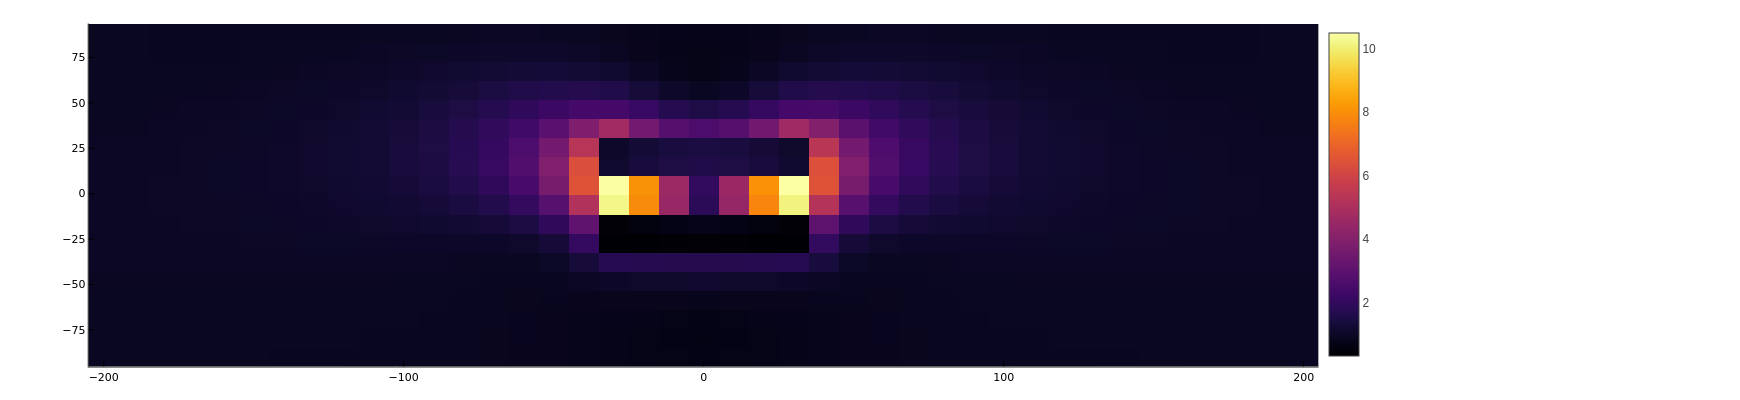

In [41]:
heatmap(xA,yA,imagenE)

## H

In [42]:
HOut = getHfielOutsie(k0,n₁,m,dThr,Structures,Xout,Yout,α,H,ϕ);

In [43]:
HIn = getHfieldInside(k0,n₂,m,dThr,Structures,Xin,Yin,α,H,ϕ);

In [44]:
grd = [Xout Yout abs.(HOut);
        Xin Yin abs.(HIn)];


In [45]:
ind = sortperm(grd[:,2])

ogrd = grd[ind,:]


ind2 = sortperm(ogrd[:,1])

ogrd2 = ogrd[ind2,:];

In [46]:
imagenH = reshape(ogrd2[:,3],(length(yA),length(xA)));

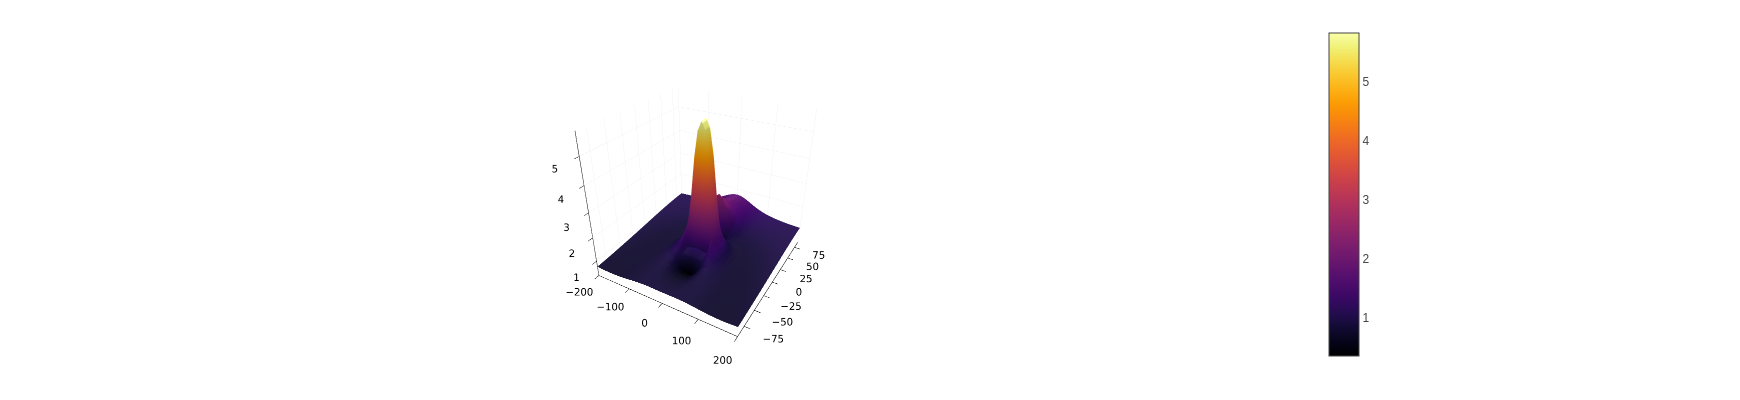

In [47]:
plotly()
surface(xA,yA,imagenH)

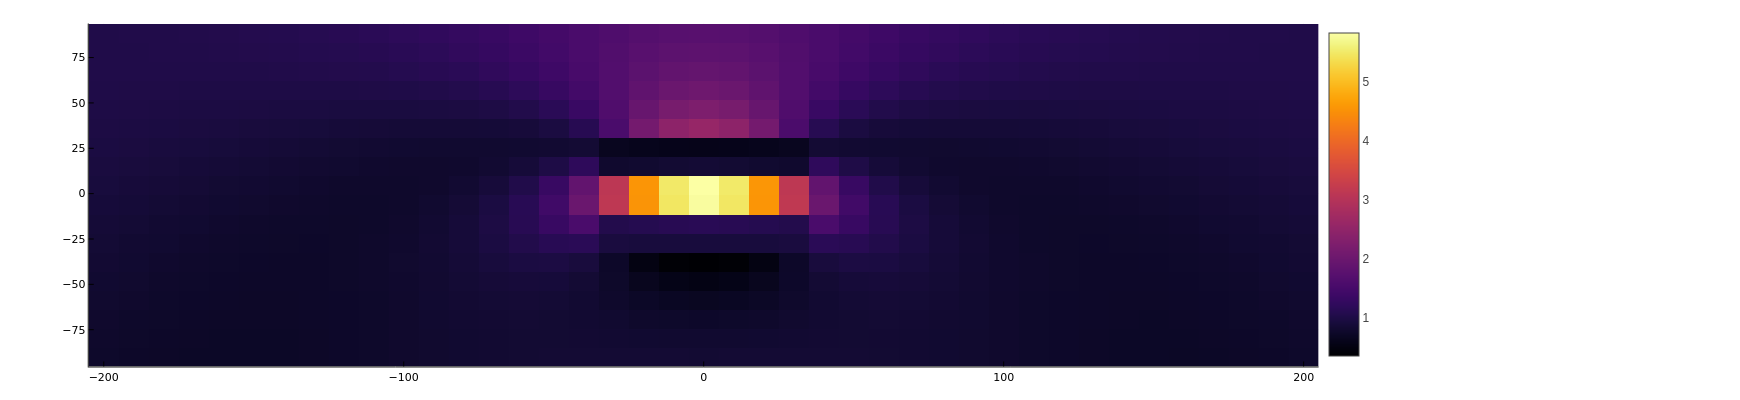

In [48]:
heatmap(xA,yA,imagenH)